In [1]:
import numpy as np
import xarray as xr
import dask
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import goat_io as io
import goat_tools as gt
import goat_means as gm
import goat_graphs as gg

In [2]:
data = io.readmf_T('lfr5', 1990, 2000)

In [6]:
data

<xarray.Dataset>
Dimensions:      (y: 148, x: 180, z: 31, time: 120)
Coordinates:
    lat          (y, x) float32 dask.array<chunksize=(148, 180), meta=np.ndarray>
    lon          (y, x) float32 dask.array<chunksize=(148, 180), meta=np.ndarray>
  * z            (z) float32 5.0 15.0 25.0 35.01 ... 4.25e+03 4.75e+03 5.25e+03
  * time         (time) object 1990-01-16 12:00:00 ... 1999-12-16 12:00:00
Dimensions without coordinates: y, x
Data variables: (12/22)
    e3t          (time, z, y, x) float32 dask.array<chunksize=(1, 31, 148, 180), meta=np.ndarray>
    thetao       (time, z, y, x) float32 dask.array<chunksize=(1, 31, 148, 180), meta=np.ndarray>
    so           (time, z, y, x) float32 dask.array<chunksize=(1, 31, 148, 180), meta=np.ndarray>
    tos          (time, y, x) float32 dask.array<chunksize=(1, 148, 180), meta=np.ndarray>
    sos          (time, y, x) float32 dask.array<chunksize=(1, 148, 180), meta=np.ndarray>
    zos          (time, y, x) float32 dask.array<chunksize=(1, 148, 180), meta=np.ndarray>
    ...           ...
    qt_oce       (time, y, x) float32 dask.array<chunksize=(1, 148, 180), meta=np.ndarray>
    sfx          (time, y, x) float32 dask.array<chunksize=(1, 148, 180), meta=np.ndarray>
    taum         (time, y, x) float32 dask.array<chunksize=(1, 148, 180), meta=np.ndarray>
    windsp       (time, y, x) float32 dask.array<chunksize=(1, 148, 180), meta=np.ndarray>
    precip       (time, y, x) float32 dask.array<chunksize=(1, 148, 180), meta=np.ndarray>
    snowpre      (time, y, x) float32 dask.array<chunksize=(1, 148, 180), meta=np.ndarray>
Attributes:
    name:         output/nemo/lfr5_oce_1m_T
    description:  ECE4/NEMO T grid variables
    title:        ECE4/NEMO T grid variables
    Conventions:  CF-1.6
    timeStamp:    2024-Apr-28 15:58:52 GMT
    uuid:         b61c68a0-d0d2-411b-9220-6c598c5f3771

In [3]:
ave = gm.spacemean(data, 'thetao', '3D', 'mix')

In [4]:
ave

array([15.78779875, 15.95757719, 16.05287613, 16.05012915, 15.94303448,
       15.7707782 , 15.6161661 , 15.53465604, 15.54506425, 15.58958233,
       15.61807514, 15.68021356, 15.79541695, 15.89769529, 15.96090065,
       15.96096   , 15.85873966, 15.69679051, 15.55292274, 15.48175677,
       15.4853692 , 15.52375138, 15.57280727, 15.6419262 , 15.75010486,
       15.88420218, 15.96345968, 15.94547133, 15.82622309, 15.66183896,
       15.50956616, 15.43357284, 15.44740274, 15.49883994, 15.554567  ,
       15.6317431 , 15.74749412, 15.88740795, 15.97569823, 15.97929022,
       15.86244074, 15.69048   , 15.53428137, 15.4625382 , 15.47994608,
       15.53935097, 15.58611812, 15.64161443, 15.73283996, 15.84029183,
       15.91912   , 15.91020021, 15.77827929, 15.59387443, 15.44262337,
       15.37057339, 15.39162252, 15.43454363, 15.46538933, 15.5197574 ,
       15.64821516, 15.78587976, 15.86711365, 15.85713553, 15.72926003,
       15.55919409, 15.41137735, 15.33409833, 15.35518964, 15.41

In [6]:
ave = gm.spacemean('lfr5', data['thetao'], '3D')

 Averaged data found 
 Averaged data found 
 Averaged data found 


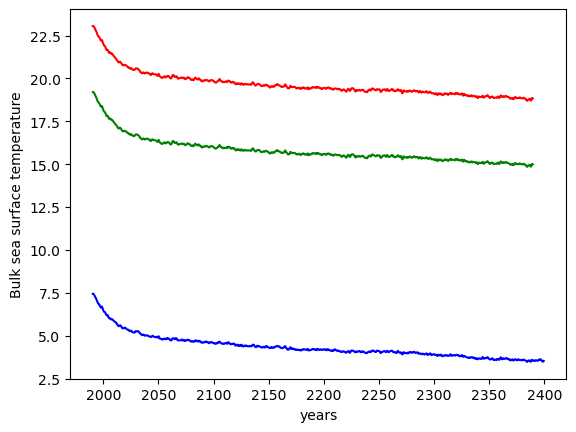

In [34]:
gg.timeseries('lfr0', 1990, 2390, 'tos', '2D', 1, 'norm', 'mave', 0, 'r')
gg.timeseries('lfr0', 1990, 2390, 'tos', '2D', ave, 'diff', 'mave', 0, 'g')
gg.timeseries_anomaly('lfr0', 1990, 2400, 'lfr5', 2200, 2210, 'tos', '2D', 'mave', 0, 'b')

 Averaged data found 
 Averaged data found 


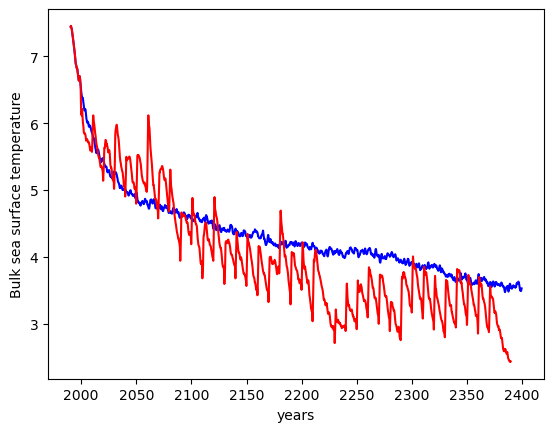

In [6]:
var='tos'
ndim='2D'
idx='mave'
gg.timeseries_anomaly('lfr0', 1990, 2400, 'lfr5', 2200, 2210, var, ndim, idx, 0, 'b')
gg.timeseries_anomaly('lf01', 1990, 2390, 'lfr5', 2200, 2210, var, ndim, idx, 0, 'r')

In [2]:
var='thetao'
ndim='3D'
idx='ave'
gg.timeseries_anomaly('lfr0', 1990, 2400, 'lfr5', 2200, 2210, var, ndim, idx, 0, 'b')
gg.timeseries_anomaly('lfr1', 1990, 2391, 'lfr5', 2200, 2210, var, ndim, idx, 410, 'b')
gg.timeseries_anomaly('lfr2', 1990, 2350, 'lfr5', 2200, 2210, var, ndim, idx, 811, 'b')
gg.timeseries_anomaly('lfr3', 1990, 2350, 'lfr5', 2200, 2210, var, ndim, idx, 1171, 'b')
gg.timeseries_anomaly('lfr4', 1990, 2350, 'lfr5', 2200, 2210, var, ndim, idx, 1531, 'b')
gg.timeseries_anomaly('lfr5', 1990, 2350, 'lfr5', 2200, 2210, var, ndim, idx, 1891, 'b')
gg.timeseries_anomaly('lf01', 1990, 2390, 'lfr5', 2200, 2210, var, ndim, idx, 0, 'r')
gg.timeseries_anomaly('lf02', 1990, 2240, 'lfr5', 2200, 2210, var, ndim, idx, 0, 'g')
plt.ylabel('Global Temperature')
# Creating custom legend
control_patch = mpatches.Patch(color='b', label='Control')
yearspan_5_patch = mpatches.Patch(color='r', label='Yearspan=5, Yearleap=10')
yearspan_2_patch = mpatches.Patch(color='g', label='Yearspan=2, Yearleap=5')
plt.gca().legend(handles=[control_patch, yearspan_5_patch, yearspan_2_patch])

 Averaged data found 
 Averaged data found 
 Averaged data found 
 Averaged data found 
 Averaged data found 
 Averaged data found 
 Averaged data found 
 Averaged data not found. Creating new file ... 
 Loading data ... 
 Averaged data found 
 Averaging ... 


: 

 Averaged data found 
 Averaged data found 
 Averaged data found 
 Averaged data found 
 Averaged data found 
 Averaged data found 
 Averaged data found 
 Averaged data found 


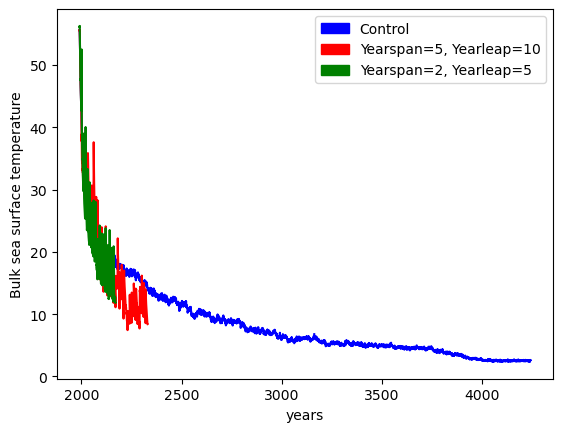

In [6]:
var='tos'
ndim='2D'
idx='ave'
gg.timeseries_anomaly('lfr0', 1990, 2400, 'lfr5', 2200, 2210, var, ndim, idx, 0, 'b')
gg.timeseries_anomaly('lfr1', 1990, 2391, 'lfr5', 2200, 2210, var, ndim, idx, 410, 'b')
gg.timeseries_anomaly('lfr2', 1990, 2350, 'lfr5', 2200, 2210, var, ndim, idx, 811, 'b')
gg.timeseries_anomaly('lfr3', 1990, 2350, 'lfr5', 2200, 2210, var, ndim, idx, 1171, 'b')
gg.timeseries_anomaly('lfr4', 1990, 2350, 'lfr5', 2200, 2210, var, ndim, idx, 1531, 'b')
gg.timeseries_anomaly('lfr5', 1990, 2350, 'lfr5', 2200, 2210, var, ndim, idx, 1891, 'b')
gg.timeseries_anomaly('lf01', 1990, 2330, 'lfr5', 2200, 2210, var, ndim, idx, 0, 'r')
gg.timeseries_anomaly('lf02', 1990, 2170, 'lfr5', 2200, 2210, var, ndim, idx, 0, 'g')
# Creating custom legend
control_patch = mpatches.Patch(color='b', label='Control')
yearspan_5_patch = mpatches.Patch(color='r', label='Yearspan=5, Yearleap=10')
yearspan_2_patch = mpatches.Patch(color='g', label='Yearspan=2, Yearleap=5')
plt.gca().legend(handles=[control_patch, yearspan_5_patch, yearspan_2_patch])

 Averaged data found 
 Averaged data found 
 Averaged data found 
 Averaged data found 
 Averaged data found 
 Averaged data found 
 Averaged data found 
 Averaged data found 


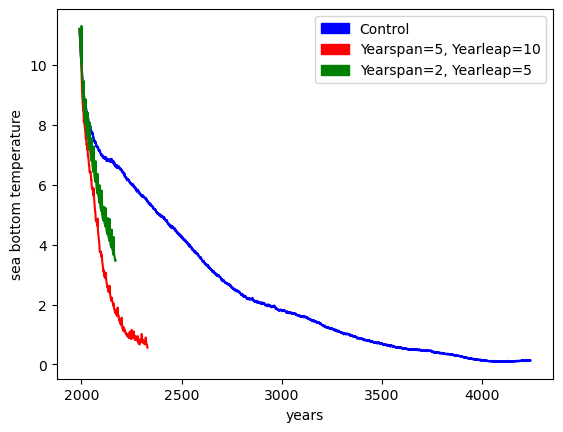

In [7]:
var='sbt'
ndim='2D'
idx='ave'
gg.timeseries_anomaly('lfr0', 1990, 2400, 'lfr5', 2200, 2210, var, ndim, idx, 0, 'b')
gg.timeseries_anomaly('lfr1', 1990, 2391, 'lfr5', 2200, 2210, var, ndim, idx, 410, 'b')
gg.timeseries_anomaly('lfr2', 1990, 2350, 'lfr5', 2200, 2210, var, ndim, idx, 811, 'b')
gg.timeseries_anomaly('lfr3', 1990, 2350, 'lfr5', 2200, 2210, var, ndim, idx, 1171, 'b')
gg.timeseries_anomaly('lfr4', 1990, 2350, 'lfr5', 2200, 2210, var, ndim, idx, 1531, 'b')
gg.timeseries_anomaly('lfr5', 1990, 2350, 'lfr5', 2200, 2210, var, ndim, idx, 1891, 'b')
gg.timeseries_anomaly('lf01', 1990, 2330, 'lfr5', 2200, 2210, var, ndim, idx, 0, 'r')
gg.timeseries_anomaly('lf02', 1990, 2170, 'lfr5', 2200, 2210, var, ndim, idx, 0, 'g')
# Creating custom legend
control_patch = mpatches.Patch(color='b', label='Control')
yearspan_5_patch = mpatches.Patch(color='r', label='Yearspan=5, Yearleap=10')
yearspan_2_patch = mpatches.Patch(color='g', label='Yearspan=2, Yearleap=5')
plt.gca().legend(handles=[control_patch, yearspan_5_patch, yearspan_2_patch])

 Averaged data found 
 Averaged data found 
 Averaged data found 
 Averaged data found 
 Averaged data found 
 Averaged data found 
 Averaged data found 
 Averaged data found 
 Averaged data found 
 Averaged data found 
 Averaged data found 
 Averaged data found 
 Averaged data found 
 Averaged data found 
 Averaged data found 
 Averaged data found 


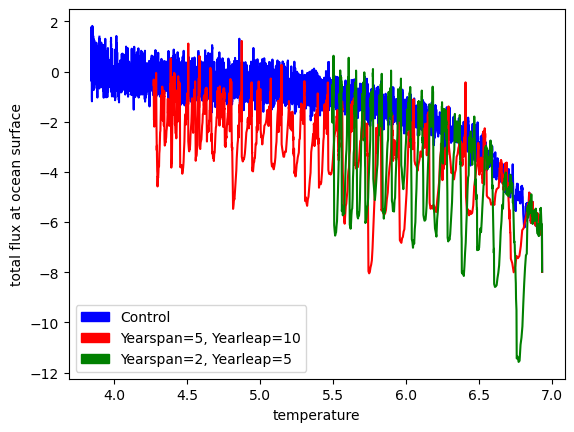

In [3]:
# gregory plot
var_x='thetao'
ndim_x='3D'
var_y='qt_oce'
ndim_y='2D'
gg.gregoryplot('lfr0', 1990, 2400, var_x, ndim_x, var_y, ndim_y, 'mave', 'b')
gg.gregoryplot('lfr1', 1990, 2391, var_x, ndim_x, var_y, ndim_y, 'mave', 'b')
gg.gregoryplot('lfr2', 1990, 2350, var_x, ndim_x, var_y, ndim_y, 'mave', 'b')
gg.gregoryplot('lfr3', 1990, 2350, var_x, ndim_x, var_y, ndim_y, 'mave', 'b')
gg.gregoryplot('lfr4', 1990, 2350, var_x, ndim_x, var_y, ndim_y, 'mave', 'b')
gg.gregoryplot('lfr5', 1990, 2350, var_x, ndim_x, var_y, ndim_y, 'mave', 'b')
gg.gregoryplot('lf01', 1990, 2330, var_x, ndim_x, var_y, ndim_y, 'mave', 'r')
gg.gregoryplot('lf02', 1990, 2170, var_x, ndim_x, var_y, ndim_y, 'mave', 'g')
# Creating custom legend
control_patch = mpatches.Patch(color='b', label='Control')
yearspan_5_patch = mpatches.Patch(color='r', label='Yearspan=5, Yearleap=10')
yearspan_2_patch = mpatches.Patch(color='g', label='Yearspan=2, Yearleap=5')
plt.gca().legend(handles=[control_patch, yearspan_5_patch, yearspan_2_patch])

 Averaged data found 
 Averaged data found 
 Averaged data found 
 Averaged data found 
 Averaged data found 
 Averaged data found 
 Averaged data found 
 Averaged data found 
 Averaged data found 
 Averaged data found 
 Averaged data found 
 Averaged data found 
 Averaged data found 
 Averaged data found 
 Averaged data found 
 Averaged data found 


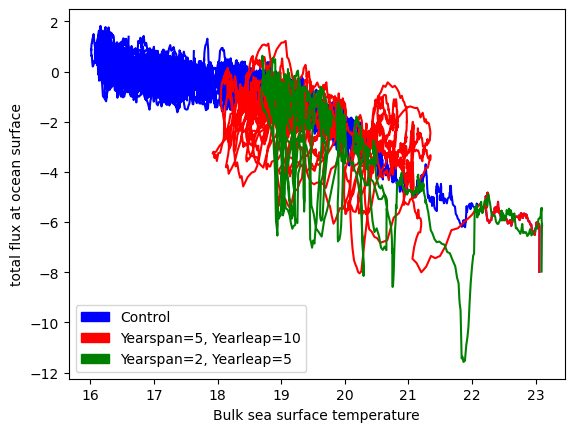

In [4]:
# gregory plot
var_x='tos'
ndim_x='2D'
var_y='qt_oce'
ndim_y='2D'
gg.gregoryplot('lfr0', 1990, 2400, var_x, ndim_x, var_y, ndim_y, 'mave', 'b')
gg.gregoryplot('lfr1', 1990, 2391, var_x, ndim_x, var_y, ndim_y, 'mave', 'b')
gg.gregoryplot('lfr2', 1990, 2350, var_x, ndim_x, var_y, ndim_y, 'mave', 'b')
gg.gregoryplot('lfr3', 1990, 2350, var_x, ndim_x, var_y, ndim_y, 'mave', 'b')
gg.gregoryplot('lfr4', 1990, 2350, var_x, ndim_x, var_y, ndim_y, 'mave', 'b')
gg.gregoryplot('lfr5', 1990, 2350, var_x, ndim_x, var_y, ndim_y, 'mave', 'b')
gg.gregoryplot('lf01', 1990, 2330, var_x, ndim_x, var_y, ndim_y, 'mave', 'r')
gg.gregoryplot('lf02', 1990, 2170, var_x, ndim_x, var_y, ndim_y, 'mave', 'g')
# Creating custom legend
control_patch = mpatches.Patch(color='b', label='Control')
yearspan_5_patch = mpatches.Patch(color='r', label='Yearspan=5, Yearleap=10')
yearspan_2_patch = mpatches.Patch(color='g', label='Yearspan=2, Yearleap=5')
plt.gca().legend(handles=[control_patch, yearspan_5_patch, yearspan_2_patch])

 Averaged data found 


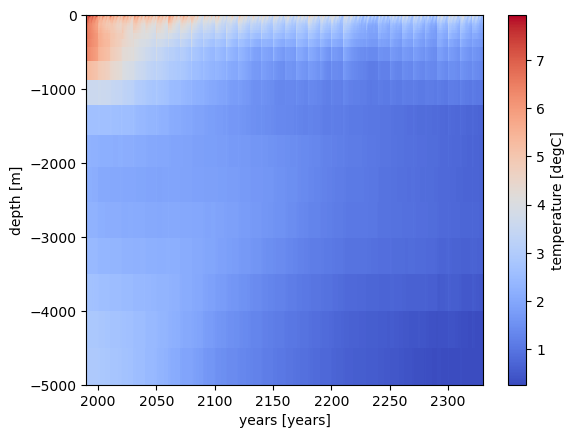

In [2]:
gg.hovmoller_anomaly('lf01', 1990, 2330, 'lfr5', 2200, 2210, 'thetao')